Based on _Hogg, Bovy & Lang (2010)_ Section 1: Standard Practise (p. 3)

In [1]:
import numpy as np
import numpy.linalg as la
import os
import pkg_resources
import hblfit.data as dat
import matplotlib.pyplot as plt

Import Table 1 (HBL 2010 p. 6) from file.

In [2]:
table_1 = dat.get_table(1)
table_1

id,x,y,sigma_y,sigma_x,rho_xy
int64,int64,int64,int64,int64,float64
1,201,592,61,9,-0.84
2,244,401,25,4,0.31
3,47,583,38,11,0.64
4,287,402,15,7,-0.27
5,203,495,21,5,-0.33
6,58,173,15,9,0.67
...,...,...,...,...,...
14,131,311,16,6,0.5
15,166,400,34,6,0.73


# Exercise 1

__Using the standard linear algebra method of this Section, fit the straight line $y = mx + b$ to the $x$, $y$, and $σ_y$ values for data points 5 through 20 in Table 1 on page 6. That is, ignore the first four data points, and also ignore the columns for $σ_x$ and $ρ_{xy}$. Make a plot showing the points, their uncertainties, and the best-fit line. Your plot should end up looking like Figure 1. What is the standard uncertainty variance $σ^2_m$
on the slope of the line?__

In [3]:
table_exercise_1 = table_1[4:]
x = np.array(table_exercise_1["x"])
y = np.array(table_exercise_1["y"])
sigma_y = np.array(table_exercise_1["sigma_y"])

First, we set up $\mathbf{A}$ and $\mathbf{A}^\mathrm{T}$ according to __Equation 3__:

In [4]:
A = np.ones((x.shape[0], 2))
A[:, 1] = x
A_T = A.transpose()
A

array([[  1., 203.],
       [  1.,  58.],
       [  1., 210.],
       [  1., 202.],
       [  1., 198.],
       [  1., 158.],
       [  1., 165.],
       [  1., 201.],
       [  1., 157.],
       [  1., 131.],
       [  1., 166.],
       [  1., 160.],
       [  1., 186.],
       [  1., 125.],
       [  1., 218.],
       [  1., 146.]])

Let's set up the covariance matrix, and its inverse, according to __Equation 4__:

In [5]:
C = np.zeros((y.shape[0], y.shape[0]))
C_inverse = np.zeros((y.shape[0], y.shape[0]))
for i, sigma in enumerate(sigma_y):
    C[i, i] = sigma ** 2
    C_inverse[i, i] = 1 / sigma ** 2

Now find (b, m) according to __Equation 5__:

In [6]:
covariance = la.inv(la.multi_dot([A_T, C_inverse, A]))
X = np.dot(covariance, la.multi_dot([A_T, C_inverse, y]))
b, m = X
b, m

(34.047727757542816, 2.2399208316310926)

The 'standard uncertainty variance' is to be found in the diagonals of the covariance matrix.

In [8]:
var_b = covariance[0,0]
var_m = covariance[1,1]
var_b, var_m

(332.92260104209953, 0.011616631123297434)

And we can translate that into standard uncertainty:

In [9]:
sigma_b = np.sqrt(var_b)
sigma_m = np.sqrt(var_m)
sigma_b, sigma_m

(18.246166749268173, 0.10778047654050076)

Here's our plot:

Text(0, 600, '$y = (2.24 \\pm 0.11)x + (34.0 \\pm 18.0)$')

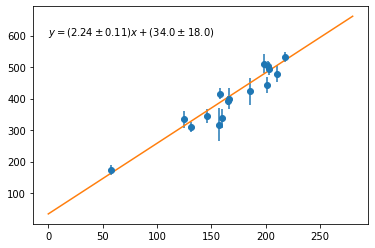

In [10]:
x_model = np.linspace(0, 280)
y_model = m * x_model + b
fig, ax = plt.subplots(1, 1)
ax.errorbar(x, y, yerr=sigma_y, fmt='o')
ax.plot(x_model, y_model)
ax.text(0, 600, f"$y = ({m.round(2)} \pm {sigma_m.round(2)})x + ({b.round(0)} \pm {sigma_b.round(0)})$")

Let's turn this into a function:

In [15]:
def covariance_matrix_from_data(sigmas):
    # This will only handle the simple diagonal case.
    C = np.zeros((sigmas.shape[0], sigmas.shape[0]))
    C_inverse = np.zeros((sigmas.shape[0], sigmas.shape[0]))
    for i, sigma in enumerate(sigmas):
        C[i, i] = sigma ** 2
        C_inverse[i, i] = 1 / sigma ** 2
    return C, C_inverse
        
def linear_standard(x, y, sigma_y):
    # First, we set up matrix A according to Equation 3:
    A = np.ones((x.shape[0], 2))
    A[:, 1] = x
    A_T = A.transpose()
    # Let's set up the covariance matrix, and its inverse, according to Equation 4:
    C, C_inverse = covariance_matrix_from_data(sigma_y)
    # Now find (b, m) according to Equation 5:
    covariance = la.inv(la.multi_dot([A_T, C_inverse, A]))
    X = np.dot(covariance, la.multi_dot([A_T, C_inverse, y]))
    b, m = X
    return b, m, covariance

# Exercise 2
__Repeat Exercise 1 but for all the data points in Table 1 on page 6. Your plot should end up looking like Figure 2. What is the standard uncertainty variance $σ^2_m$ on the slope of the line? Is there anything you don’t
like about the result? Is there anything different about the new points you have included beyond those used in Exercise 1?__

As above, but this time with the full data set:

1.0767475241683329 213.2734919759605


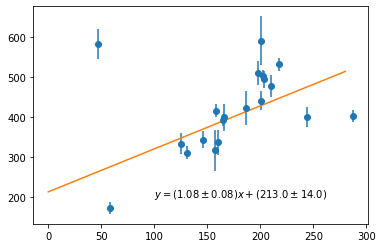

In [23]:
x = np.array(table_1["x"])
y = np.array(table_1["y"])
sigma_y = np.array(table_1["sigma_y"])

b, m, covariance = linear_standard(x, y, sigma_y)
var_b = covariance[0, 0]
var_m = covariance[1, 1]
sigma_b = np.sqrt(var_b)
sigma_m = np.sqrt(var_m)

y_model = m * x_model + b

fig, ax = plt.subplots(1, 1)
ax.errorbar(x, y, yerr=sigma_y, fmt='o')
ax.plot(x_model, y_model)
ax.text(100, 200, f"$y = ({m.round(2)} \pm {sigma_m.round(2)})x + ({b.round(0)} \pm {sigma_b.round(0)})$")

print(m, b)

What we don't like, probably, is that the outliers drastically affect the fit, and that the apparent poorness of the fit is not reflected in an increase in uncertainty (it is, in fact, smaller):

In [25]:
print(var_b, var_m)
print(sigma_b, sigma_m)

207.1881890900818 0.005991810080070381
14.39403310716221 0.0774067831657561


# Exercise 3
__Generalize the method of this Section to fit a general quadratic (second order) relationship. Add another column to matrix $\mathbf{A}$ containing the values $x^2_i$, and another element to vector $\mathbf{X}$ (call it $q$). Then re-do Exercise 1 but fitting for and plotting the best quadratic relationship__

$g(x) = qx^2 +mx + b$ (8)

__Your plot should end up looking like Figure 3.__

In [30]:
table_exercise_1 = table_1[4:]
x = np.array(table_exercise_1["x"])
y = np.array(table_exercise_1["y"])
sigma_y = np.array(table_exercise_1["sigma_y"])

A = np.ones((x.shape[0], 3))
A[:, 1] = x
A[:, 2] = x**2
A_T = A.transpose()

C, C_inverse = covariance_matrix_from_data(sigma_y)
covariance = la.inv(la.multi_dot([A_T, C_inverse, A]))
X = X = np.dot(covariance, la.multi_dot([A_T, C_inverse, y]))
b, m, q = X
sigma_b = np.sqrt(covariance[0, 0])
sigma_m = np.sqrt(covariance[1, 1])
sigma_q = np.sqrt(covariance[2, 2])

b, m, q

(72.89462647168693, 1.5960504522745396, 0.0022988884081209804)

Text(100, 200, '$y = (0.0023 \\pm 0.002) x^2 (1.6 \\pm 0.58) x + (73.0 \\pm 39.0)$')

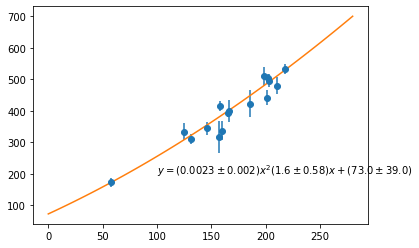

In [31]:
y_model = q * x_model ** 2 + m * x_model + b

fig, ax = plt.subplots(1, 1)
ax.errorbar(x, y, yerr=sigma_y, fmt='o')
ax.plot(x_model, y_model)
ax.text(100, 200, f"$y = ({q.round(4)} \pm {sigma_q.round(4)}) x^2 ({m.round(2)} \pm {sigma_m.round(2)}) x + ({b.round(0)} \pm {sigma_b.round(0)})$")